In [1]:
#
# Computing diffusion coeff and exponent alpha from individual msd
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
import pickle
#from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import brunnermunzel, linregress
from sklearn.linear_model import LinearRegression

In [292]:
#
# read csv files
#

file_id = 'SK577-No3-6-2'

df = pd.read_csv(os.path.join('data', file_id + '.csv'))

dir_save = 'results_' + file_id
dir_save = dir_save.replace('-', '_')
print(dir_save)
os.makedirs(dir_save, exist_ok=True)
#print(df)
#print(df2)
#df['m0'] = df2['m0']
print(df)
n_traj = df['Trajectory'].max()
print('# of trajectories: ', n_traj)

results_SK577_No3_6_2
              Trajectory  Frame        x         y  z     m0     m1     m2  \
0          1           1      0  353.026     1.537  0  1.206  1.426  2.583   
1          2           1      1  352.965     1.728  0  1.268  1.366  2.387   
2          3           1      2  352.491     1.256  0  1.060  1.176  1.817   
3          4           1      3  351.584     1.410  0  0.964  1.313  2.131   
4          5           1      4  352.188     1.630  0  1.110  1.223  1.880   
...      ...         ...    ...      ...       ... ..    ...    ...    ...   
79813  79814        5542    100  297.765   932.614  0  1.148  1.501  2.799   
79814  79815        5543     99  580.106   942.697  0  0.954  1.426  2.562   
79815  79816        5543    100  580.564   942.842  0  0.909  1.387  2.411   
79816  79817        5544     99  768.914  1022.384  0  0.821  1.209  1.882   
79817  79818        5544    100  769.279  1022.148  0  0.795  1.323  2.275   

          m3      m4  NPscore  
0      5.

In [ ]:
#
# basic characterization
#
lengths = []
m0s = []
for n in range(n_traj):
    df2 = df.loc[df['Trajectory'] == n+1]
    lengths.append(df2.shape[0])
    if n < 10:
        print(n, ' th traj length = ', df2.shape[0])
    if df2.shape[0] > 5:
        m0s.append(df2['m0'].mean())

lengths = np.array(lengths)
m0s = np.array(m0s)
print(np.mean(m0s))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=lengths, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Trajectory length [Frame]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_traj_length.eps'))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s[m0s[:] < 20000], bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)

0  th traj length =  12
1  th traj length =  78
2  th traj length =  9
3  th traj length =  2
4  th traj length =  4
5  th traj length =  14
6  th traj length =  49
7  th traj length =  30
8  th traj length =  5
9  th traj length =  55


(95,) (95,)
(95, 2)


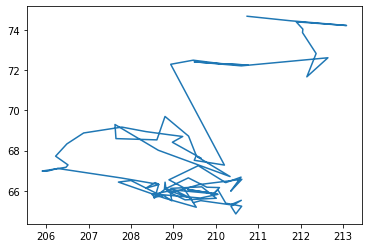

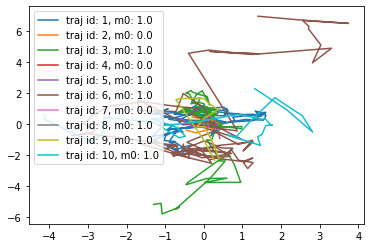

In [288]:
#
# data visualization
#
def select_single_trajectory(df, id_traj = 1, verbosity=1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    #if id_cell == 1: print(df2)# for debug
    coord_x = df2['x'].to_numpy()
    coord_y = df2['y'].to_numpy()
    if verbosity == 1:
        print(coord_x.shape, coord_y.shape)
    return np.stack([coord_x, coord_y], axis=-1)

def compute_total_intensity(df, id_traj = 1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    return df2['m0'].mean()

xy = select_single_trajectory(df, 6)
print(xy.shape)
fig, ax = plt.subplots()
plt.plot(xy[:, 0], xy[:, 1])

fig, ax = plt.subplots()
for n in range(10):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    m0 = compute_total_intensity(df, n+1)
    mean_xy = np.mean(xy, axis=0)
    label = 'traj id: ' + str(n+1) + ', m0: ' + str(np.round(m0))
    plt.plot(xy[:, 0] - mean_xy[0], xy[:, 1] - mean_xy[1], label=label)
plt.legend()

len(msds) =  429


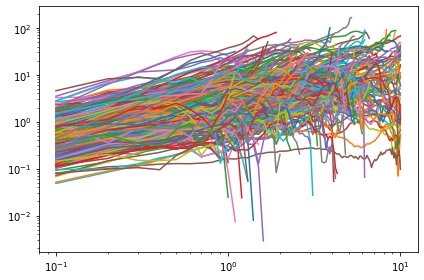

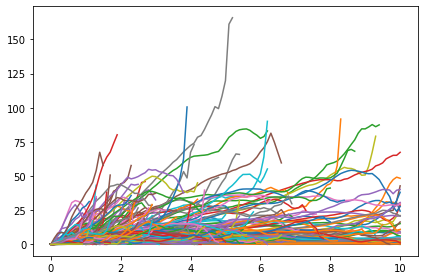

In [289]:
#
# MSD analysis
#
def naive_msd(r):
    shifts = np.arange(len(r))
    msd = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None, :] - r[shift:, :]# if shift == 0, r[:None, :] not r[None, :]
        sqdist = np.square(diffs).sum(axis=1)
        msd[i] = sqdist.mean()

    return msd

msds = []
for n in range(n_traj):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    if xy.shape[0] >= 10:
        #disp = (xy - xy[0, :])[1:]
        msd = naive_msd(xy)
        msds.append(msd)
print('len(msds) = ', len(msds))
num_msd = len(msds)

with open(os.path.join(dir_save, 'msds'), 'wb') as fp:
    pickle.dump(msds, fp)

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.loglog(ts[1:], msd[1:])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_log.eps'))

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.plot(ts, msd)
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_normal.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

0.05276967309455488
429


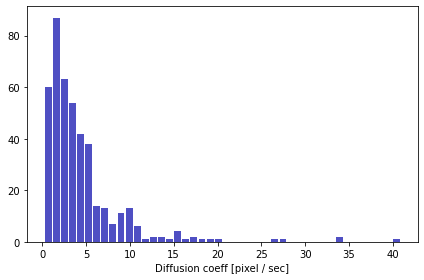

In [290]:
#
# individual diffusion coeffs assuming normal diffusion, following the protocol in (Delarue, Cell, 2018)
#
diffs = []
for msd in msds:
    msd_trunc = msd[:10]
    ts = 0.1 * np.arange(msd_trunc.shape[0])
    reg = LinearRegression(fit_intercept=False).fit(ts.reshape(-1, 1), msd_trunc)
    #print(reg.coef_)
    #res = linregress(ts, msd_trunc) # for comparison
    #print(res.slope)
    diffs.append(reg.coef_[0])

diffs = np.array(diffs)
fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=diffs, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Diffusion coeff [pixel / sec]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_diff_coeff.eps'))

Deff = (diffs/4)*0.26*0.26 # Deff(pixel/sec)からDeff(um^2/sec)へ変換
print(np.median(Deff)) 
print(np.count_nonzero(Deff))

np.savetxt(os.path.join(dir_save, 'Deff.txt'), Deff)

     0         1         2         3         4         5         6    \
0    0.0  0.267960  0.543681  0.754481  0.898440  1.015670  1.167056   
1    0.0  0.277371  0.590696  0.859330  1.140352  1.427316  1.652549   
2    0.0  0.917441  1.889439  2.581613  3.099911  3.592163  4.238652   
3    0.0  1.048389  3.077959  3.796386  4.494210  5.212537  5.903060   
4    0.0  0.835626  2.086670  2.591800  2.971228  3.738834  4.670162   
..   ...       ...       ...       ...       ...       ...       ...   
424  0.0  0.303356  0.750365  1.567446  2.542459  3.673902  4.580491   
425  0.0  0.079625  0.098238  0.105038  0.094917  0.190065  0.265808   
426  0.0  1.142506  1.956437  2.302321  3.509701  3.649492  3.911143   
427  0.0  0.450503  1.366559  2.340114  3.670472  5.408196  6.447298   
428  0.0  0.143579  0.200560  0.149709  0.148416  0.155557  0.232761   

          7         8          9    ...        91         92         93   \
0    1.307540  1.380351   1.382896  ...   7.849675   8.0642

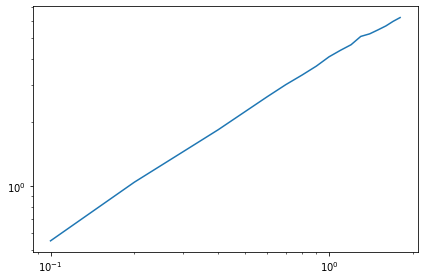

In [291]:
#
# Ensemble-averaged MSD
#
#for msd in msds:
#    print(msd.shape)
df_msds = pd.DataFrame(msds)
print(df_msds)
ens_msd = df_msds.mean(0, skipna=True).values
print(ens_msd)

fig, ax = plt.subplots()
ts = 0.1 * np.arange(ens_msd.shape[0])
plt.loglog(ts[1:19], ens_msd[1:19])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'ens_msd_log.eps'))

res = linregress(np.log(ts[1:11]), np.log(ens_msd[1:11])) # for comparison
print(res, res.slope)

np.savetxt(os.path.join(dir_save, 'ens_msd.txt'), ens_msd)